# Визуализация с seaborn

## Урок 1. Что такое seaborn

В этом уроке вы узнаете, что такое seaborn, а также, зачем нужна еще одна библиотека для визуализации, если уже есть `matplotlib`.



`seaborn` - это не замена `matplotlib`, а его дополнение, которое существенно упрощает построение графиков, часто используемых в анализе данных. Кроме того, `seaborn` ориентирован на работу с датафреймами `pandas`, поэтому, во многих случаях, на подготовку данных для `seaborn` требуется меньше времени, чем для `matplotlib`.

Ссылка на документацию seaborn: https://seaborn.pydata.org/index.html

Давайте теперь посмотрим на практике, чем построение визуализаций в `seaborn` отличается от работы в `matplotlib`. Рассмотрим эти отличия на примере графика гистограмм минимальных зарплат в 2000 и 2010 годах, который мы строили на предыдущем модуле.

#### **Гистограммы**

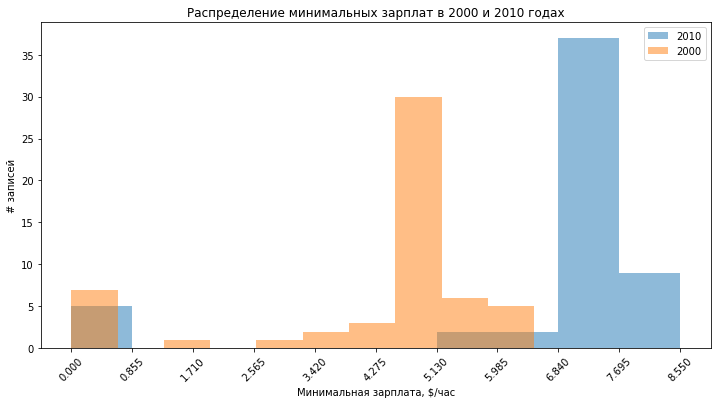

In [ ]:
# Импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

# Загрузим данные
df = pd.read_csv('wage-data-coast.csv')

data = df[df['Year'] == 2000]['Salary']
data1 = df[df['Year'] == 2010]['Salary']

# построим график с matplotlib
fig, ax = plt.subplots(figsize=(12,6))
_, bins, _ = ax.hist(data1, label = '2010', alpha = 0.5)
ax.hist(data, label = '2000', alpha = 0.5)

ax.set_title('Распределение минимальных зарплат в 2000 и 2010 годах')
ax.set_xlabel('Минимальная зарплата, $/час')
ax.set_ylabel('# записей')
ax.set_xticks(list(bins))
ax.tick_params(axis = 'x', rotation = 45)
ax.legend()

plt.show()

В первых двух строках кода мы готовим данные, причем для каждой гистограммы мы подготавливаем свой массив данных. Затем мы инициализируем график, после этого добавляем гистограммы. На этих же двух строках мы работаем с отсечками: задаем количество столбцов первой гистограмме, затем определяем отсечки и задаем их второй гистограмме. После этого форматируем заголовок и оси, устанавливаем общие отсечки и легенду. И только после этого выводим график на экран. Достаточно большой объем работы, не правда ли? 

Давайте теперь построим такой же график, но с помощью `seaborn`. Первым делом поднимемся в первую ячейку и импортируем эту библиотеку. При импорте ей принято давать короткое имя sns.  Также иногда случается ситуация, когда Jupyter не устанавливает стиль seaborn самостоятельно. Поэтому давайте установим стиль вручную, с помощью `plt.style.use()`.

In [ ]:
import seaborn as sns
plt.style.use('seaborn')

Подготовим данные. Поскольку `seaborn` отлично работает с `pandas`, подготовка данных будет намного проще. В этом примере мы из исходного датафрейма оставим только записи за 2000 и 2010 год. 

Для построения гистограммы нужно вызвать функцию `sns.histplot()`, т.е. график гистограммы. Первым параметром **data** укажем наш подготовленный датафрейм. Следующий параметр при построении гистограммы - х, т.е. признак из указанного датафрейма, по которому нужно строить гистограмму.

Однако нам нужно построить 2 гистограммы, отдельно для 2000 и отдельно для 2010 года. Чтобы построить вторую гистограмму, не нужно снова вызывать функцию `histplot`, а нужно передать параметр **hue**, т.е. оттенок, с указанием признака, по которому нужно фильтровать данные для отдельных гистограмм. В нашем случае это параметр **Year**. 

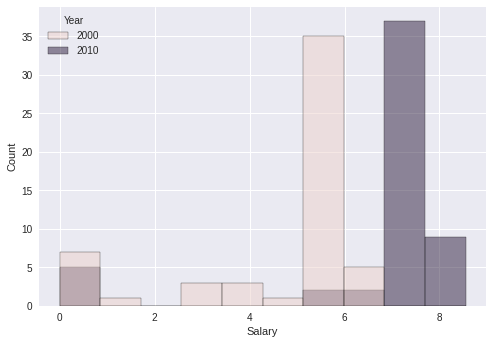

In [ ]:
data = df[df['Year'].isin([2000,2010])]

sns.histplot(data=data, x='Salary', hue='Year');

Обратите внимание: если при попытке построить гистограмму вы получаете ошибку `module 'seaborn' has no attribute 'histplot'` — у вас установлена устаревшая версия библиотеки seaborn. Обновить её можно с помощью команды:

* `!pip install seaborn --upgrade` в ячейке ноутбука; 
* `pip install seaborn --upgrade` в терминале Jupyter. 

Для построения графика мы написали ровно одну строку кода, а `seaborn` для нас,
1. во-первых, привел столбцы к одинаковой ширине,
2. во-вторых, самостоятельно отрегулировал прозрачность столбцов, чтобы обе гистограммы было видно одновременно,
3. в-третьих, подписал обе оси, пусть и стандартными названиями,
4. в-четвертых, добавил легенду.

Т.е. `seaborn` сделал за нас достаточно большой объем работ по форматированию графика.

При этом, поскольку seaborn базируется на `matplotlib`, мы можем использовать возможности `matplotlib` для более тонкой настройки графика.


Теперь мы можем присвоить переменной ax результат выполнения функции histplot, а затем, например, добавить заголовок и новые подписи осей.

Text(0, 0.5, '# записей')

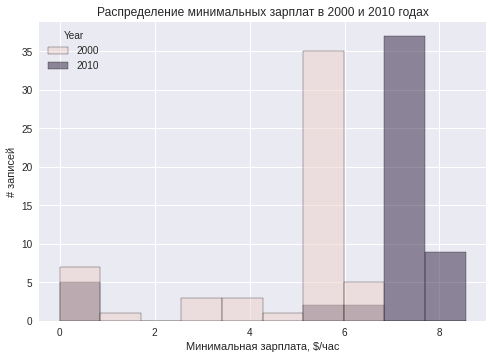

In [ ]:
data = df[df['Year'].isin([2000,2010])]

ax = sns.histplot(data=data, x='Salary', hue='Year');

ax.set_title('Распределение минимальных зарплат в 2000 и 2010 годах')
ax.set_xlabel('Минимальная зарплата, $/час')
ax.set_ylabel('# записей')

Давайте построим на одних координатных осях линейные графики изменения минимальных зарплат в пяти штатах: Аляске, Калифорнии, Вашингтоне, Аризоне и Флориде.

Сначала выберем данные. Отфильтруем только записи, соответствующие нашим целевым штатам.

Инициализируем график, зададим нужный нам размер. Для построения линейного графика в `seaborn` используется функция `lineplot`. Передаем в нее параметр **data**, т.е. наш датасет. Теперь укажем параметр **x**, это признак, который будет отложен по оси х, т.е. год. В параметр **y** передадим признак **Salary**, т.е. зарплату, которую нужно указывать по оси у. 

Для того, чтобы данные каждого штата были показаны отдельной линией, в параметр **hue** передадим признак **State**. И последним параметром передадим объект **axes**. Этим мы явно скажем `seaborn`, чтобы он отображал данные именно на этом графике, потому что мы до этого настроили этот объект так, как нам нужно. 


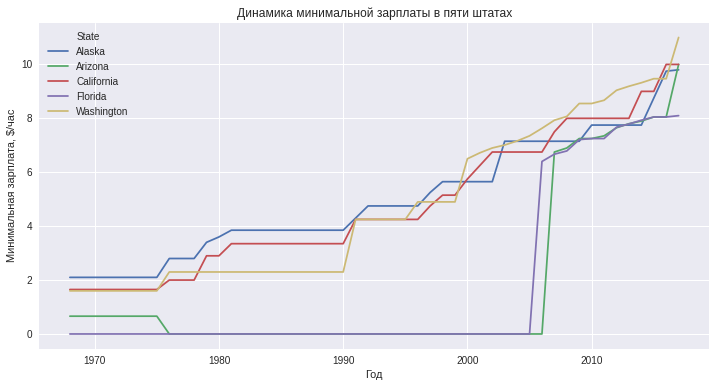

In [ ]:
data = df[df['State'].isin(['Alaska', 'California', 'Washington', 'Arizona', 'Florida'])]

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=data, x='Year', y='Salary', hue='State', ax=ax)

ax.set_title('Динамика минимальной зарплаты в пяти штатах')
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная зарплата, $/час')

plt.show()